In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_3704\2279155719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')


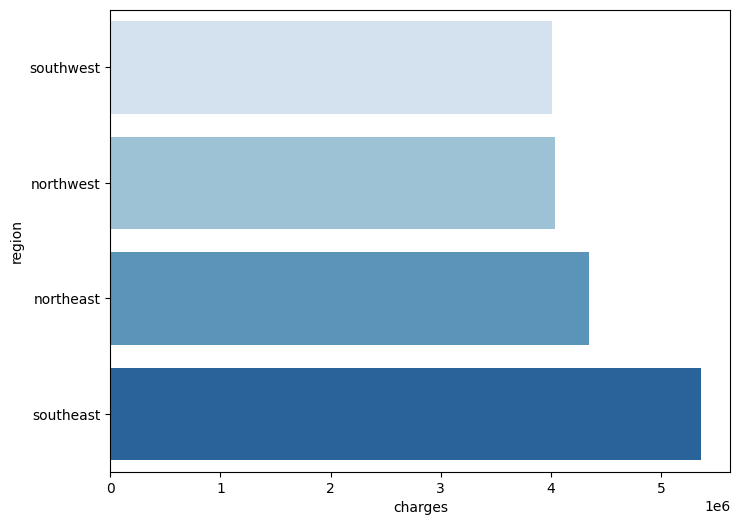

In [9]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x = charges.head(), y = charges.head().index, palette='Blues')

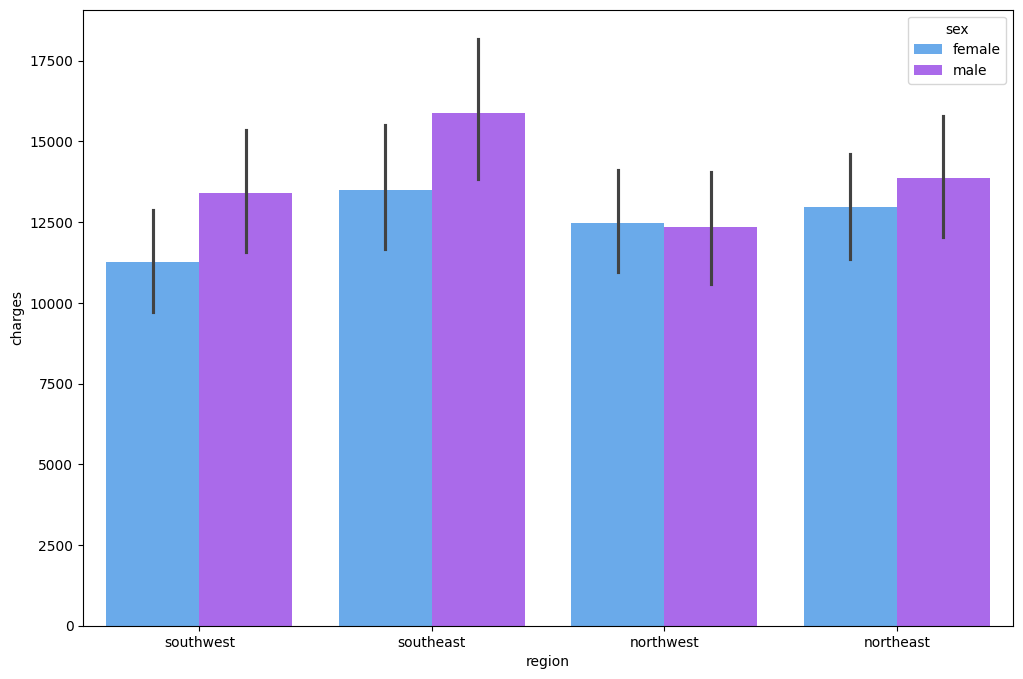

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

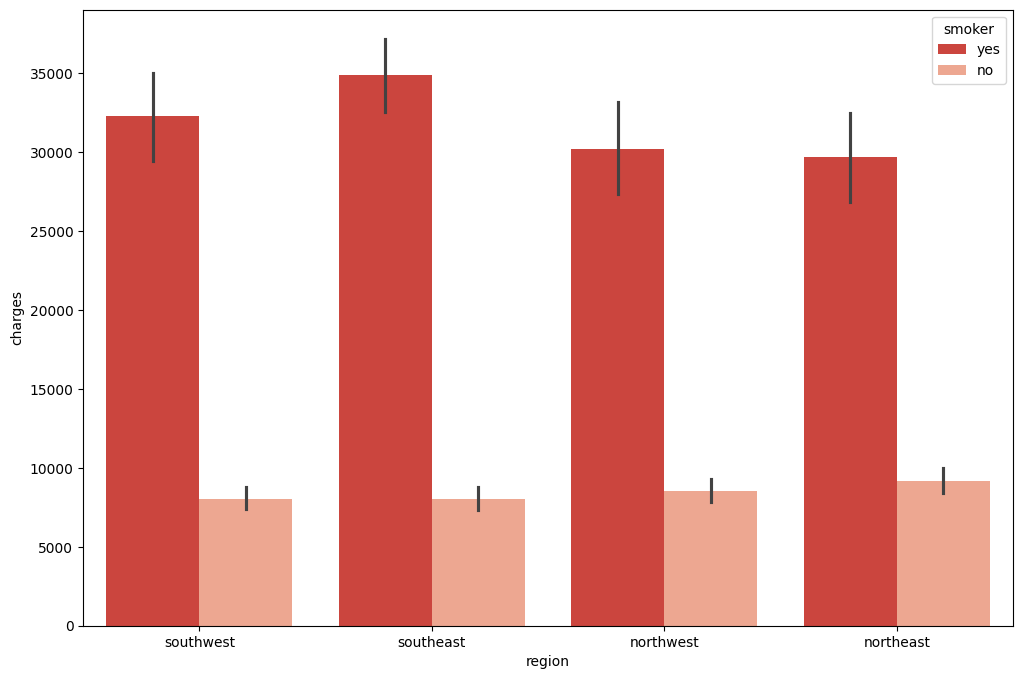

In [12]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges', 
                 hue = 'smoker', data=df, palette='Reds_r')

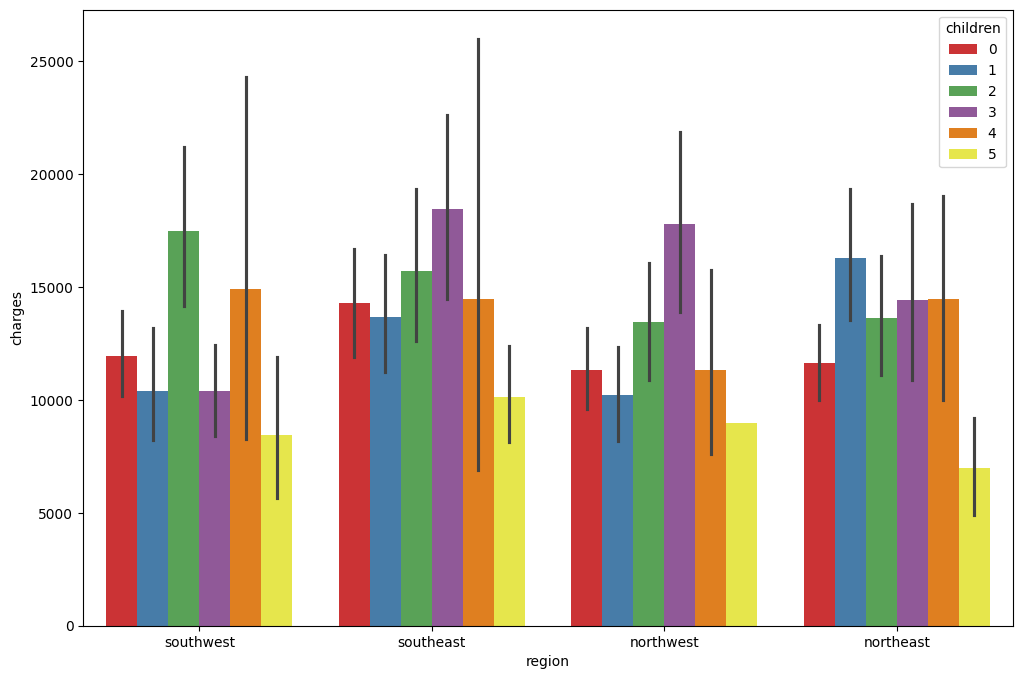

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',
                hue='children', data=df,
                palette='Set1')

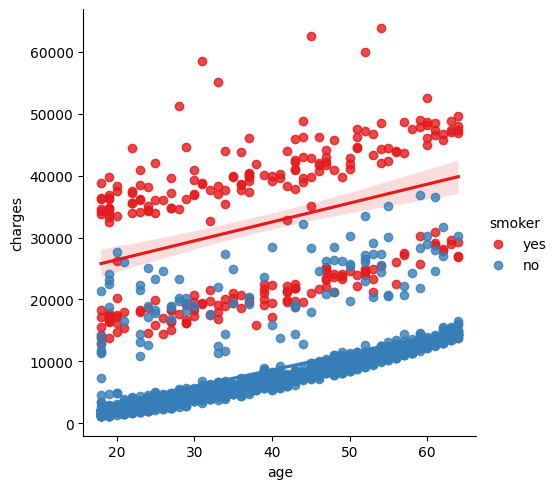

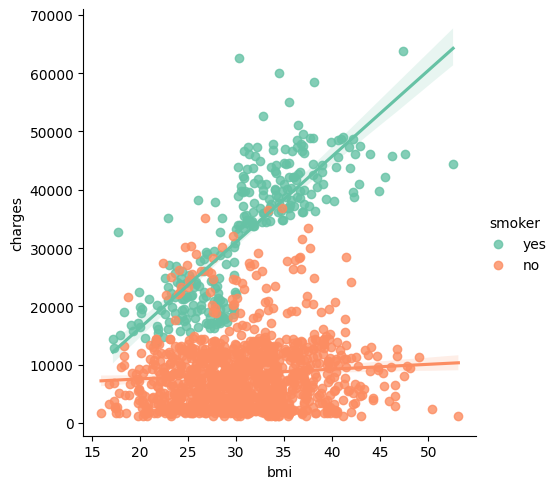

In [16]:
ax = sns.lmplot(x='age', y='charges', data=df,
                hue='smoker', palette='Set1')
ax = sns.lmplot(x='bmi', y='charges', data=df,
                hue='smoker', palette='Set2')

In [18]:
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker',
                                      'region']].astype('category')

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

In [22]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2,
                                           random_state=0)

In [25]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = linear_reg.predict(x_test)

In [27]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 : {0:0.3f}'.format(R2))
print('RMSE : {0:0.3f}'.format(rmse))

R2 : 0.800
RMSE : 5643.220


In [31]:
importance = linear_reg.coef_
variables = ['age', 'sex', 'bmi', 'children',
            'smoker', 'region']
for i,v in zip(variables,importance) :
    print('Future: %s, Score: %.5f' % (i,v))

Future: age, Score: 253.99185
Future: sex, Score: -24.32455
Future: bmi, Score: 328.40262
Future: children, Score: 443.72930
Future: smoker, Score: 23568.87948
Future: region, Score: -288.50857


In [46]:
#tugas
df = pd.read_csv('Real estate.csv')
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [47]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [48]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_3704\126167560.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)


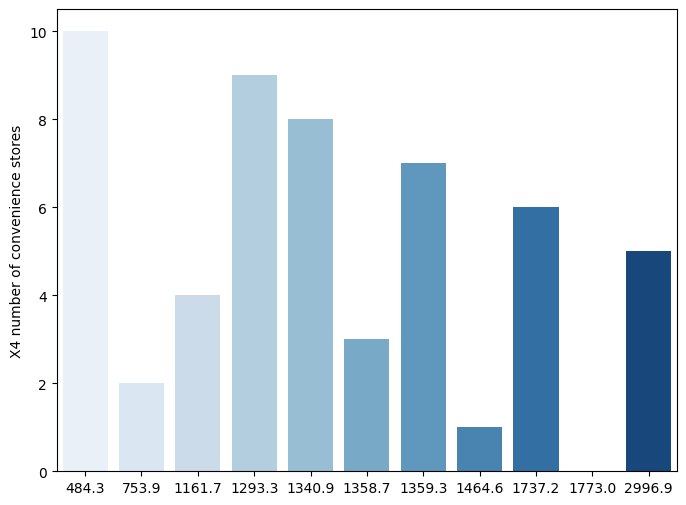

In [49]:
# Menghitung total harga rumah per jumlah toko terdekat, lalu mengurutkan
charges = df['Y house price of unit area'].groupby(df['X4 number of convenience stores']).sum().sort_values(ascending=True)

# Membuat visualisasi barplot horizontal
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)

# Menampilkan plot
plt.show()

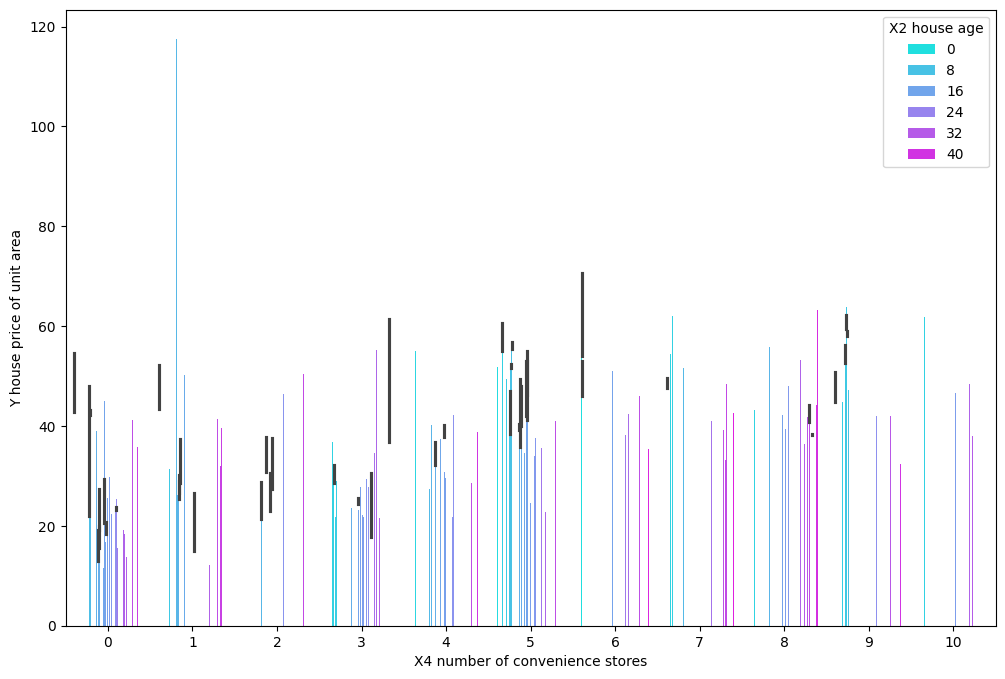

In [52]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='X4 number of convenience stores',
                 y='Y house price of unit area', hue='X2 house age',
                 data=df, palette='cool')

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

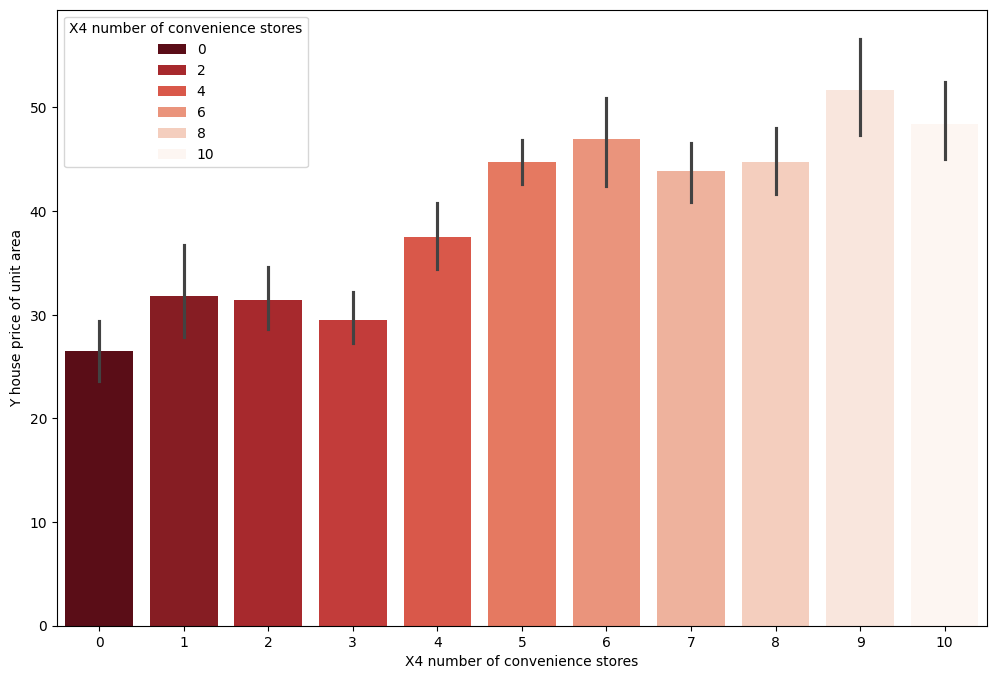

In [53]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='X4 number of convenience stores',
            y='Y house price of unit area',
            hue='X4 number of convenience stores',
            data=df, palette='Reds_r')

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

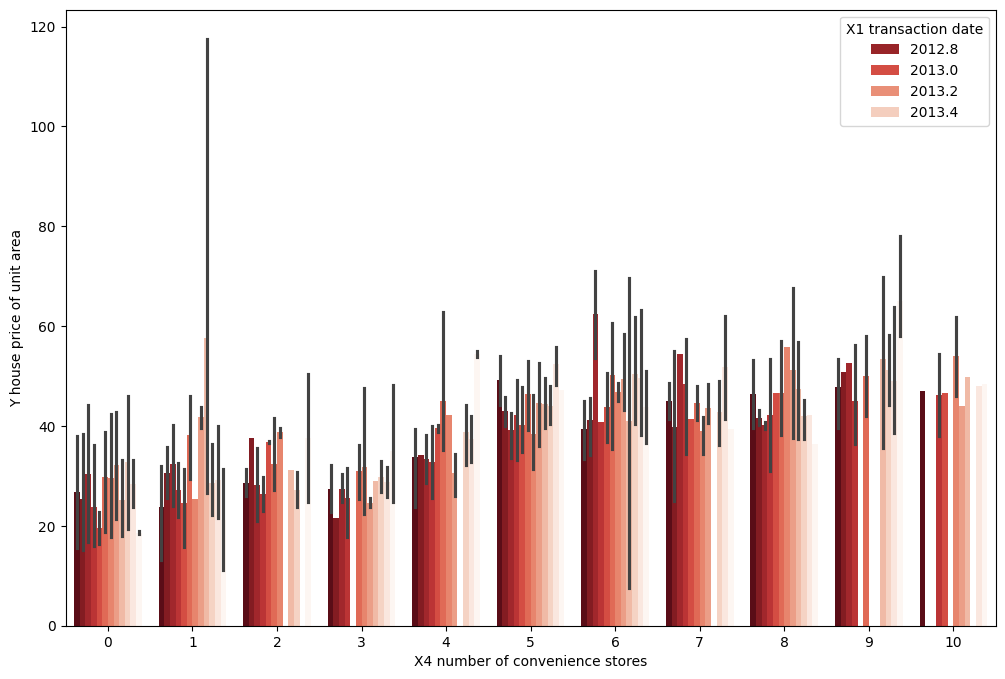

In [54]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.barplot(x='X4 number of convenience stores',
            y='Y house price of unit area',
            hue='X1 transaction date',
            data=df, palette='Reds_r')

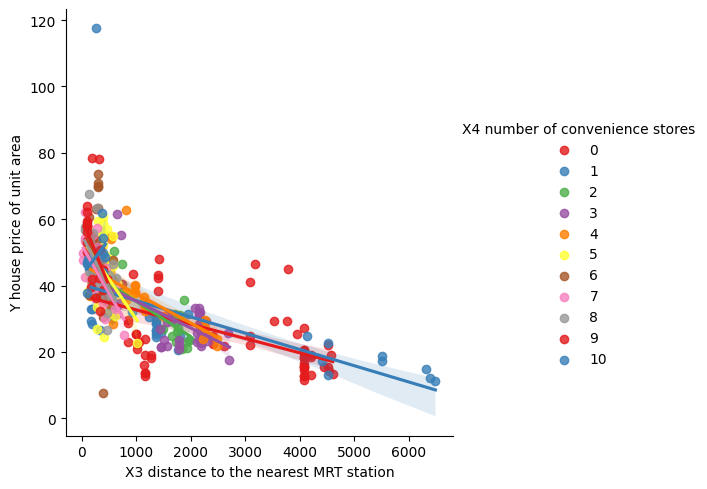

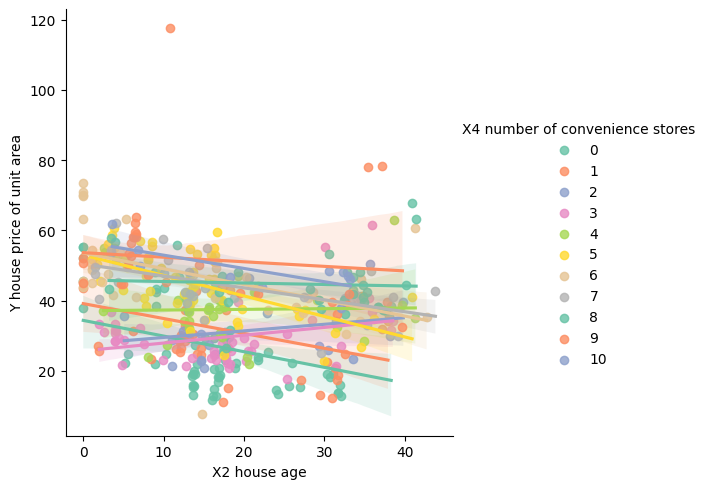

In [55]:
ax = sns.lmplot(x='X3 distance to the nearest MRT station',
                y='Y house price of unit area', data=df,
                hue='X4 number of convenience stores', palette='Set1')
ax = sns.lmplot(x='X2 house age', y='Y house price of unit area',
                data=df, hue='X4 number of convenience stores', palette='Set2')

In [56]:
df['X4 number of convenience stores'] = df['X4 number of convenience stores'].astype('category')

In [57]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['X4 number of convenience stores'] = label.fit_transform(df['X4 number of convenience stores'])

In [58]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [59]:
x = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

In [60]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [61]:
y_pred = linear_reg.predict(x_test)

In [62]:
R2 = metrics.r2_score(y_test, y_pred)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2    : {0:.3f}'.format(R2))
print('RMSE  : {0:.3f}'.format(rmse))

R2    : 0.656
RMSE  : 7.733


In [63]:
importance = linear_reg.coef_
variables = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']
for i, v in zip(variables, importance):
    print('Feature: %s, Score: %.5f' % (i, v))

Feature: X1 transaction date, Score: -0.00446
Feature: X2 house age, Score: 4.87352
Feature: X3 distance to the nearest MRT station, Score: -0.26278
Feature: X4 number of convenience stores, Score: -0.00452
Feature: X5 latitude, Score: 1.08106
Feature: X6 longitude, Score: 226.07761
Feature: Y house price of unit area, Score: -9.84541


In [67]:
#2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [68]:
# Dataset dengan semua fitur
X_all = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Dataset tanpa fitur dengan pengaruh rendah
X_reduced = df[['X2 house age', 'X5 latitude', 'X6 longitude']]  # Fitur dengan pengaruh signifikan

In [69]:
# Membagi dataset menjadi training dan testing
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Model dengan semua fitur
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)

# Model tanpa fitur dengan pengaruh rendah
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Evaluasi performa
mse_all = mean_squared_error(y_test, y_pred_all)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)

print(f"MSE dengan semua fitur: {mse_all:.5f}")
print(f"MSE tanpa fitur dengan pengaruh rendah: {mse_reduced:.5f}")

MSE dengan semua fitur: 53.50562
MSE tanpa fitur dengan pengaruh rendah: 72.01936
